# Generating Polygon

# Segmenting as Voronoi Diagram

In [18]:
from src.backend.model import StarPolygon, Point
from src.backend.utils import generate_star_polygon
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


def find_voroni_vertices(polygon: StarPolygon) -> list[Point]:
    voronoi = Voronoi(polygon.asarray())
    return [Point(x=int(x), y=int(y)) for x, y in voronoi.vertices]


def draw_polygon(polygon: StarPolygon) -> None:
    points = polygon.asarray()
    voronoi = Voronoi(polygon.asarray())
    v_points = [Point(x=int(x), y=int(y)) for x, y in voronoi.vertices]
    plt.plot(*points.T)
    # plt.scatter(x=[point.x for point in v_points], y=[point.y for point in v_points])
    voronoi_plot_2d(voronoi)

In [19]:
polygon = generate_star_polygon(
    center=Point(x=10, y=10), n_vertices=10
)
find_voroni_vertices(polygon=polygon)

[Point(x=8, y=5),
 Point(x=9, y=4),
 Point(x=7, y=10),
 Point(x=7, y=7),
 Point(x=6, y=13),
 Point(x=-10, y=7),
 Point(x=19, y=-3),
 Point(x=18, y=-2),
 Point(x=12, y=7),
 Point(x=13, y=7),
 Point(x=11, y=10),
 Point(x=16, y=13),
 Point(x=16, y=10)]

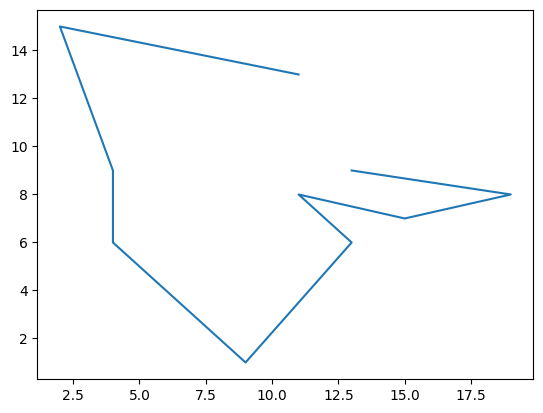

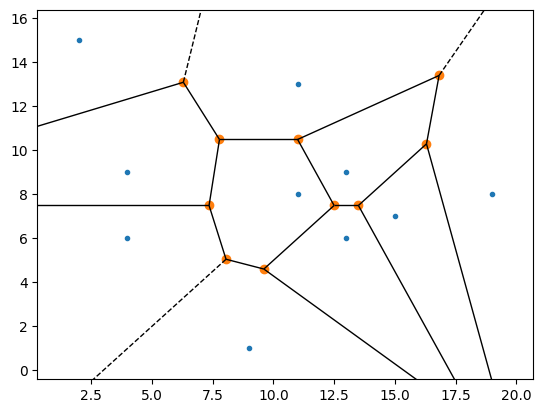

In [20]:
draw_polygon(polygon=polygon)

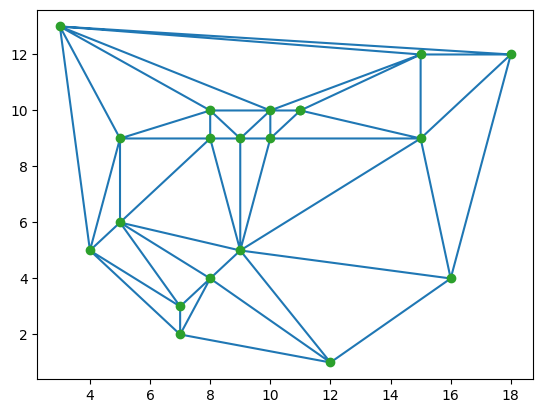

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from src.backend.model import StarPolygon, Point
from src.backend.utils import generate_star_polygon
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

points = generate_star_polygon(center=Point(x=10, y=10), n_vertices=20).asarray()
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

# Using pyvoronoi